In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
temp_counters = np.load('2M_32k_counter_temp_data_20191020_190447.npz')
counts_32k, counts_2M, temperature = temp_counters['counts_32k'], temp_counters['counts_2M'], temp_counters['temperature']

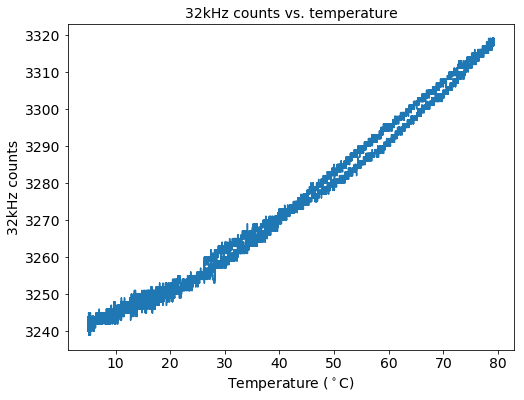

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(temperature, counts_32k)
plt.title('32kHz counts vs. temperature', fontsize=14)
plt.xlabel('Temperature ($^\circ$C)', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('32kHz counts', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('32k_temp.pdf', bbox_inches='tight')
plt.show()

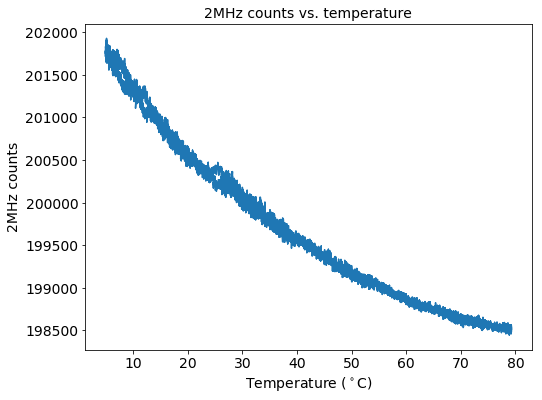

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(temperature, counts_2M)
plt.title('2MHz counts vs. temperature', fontsize=14)
plt.xlabel('Temperature ($^\circ$C)', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('2MHz counts', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('2M_temp.pdf', bbox_inches='tight')
plt.show()

Slope: -30.714504419088694 Intercept: 1915.1418656930364


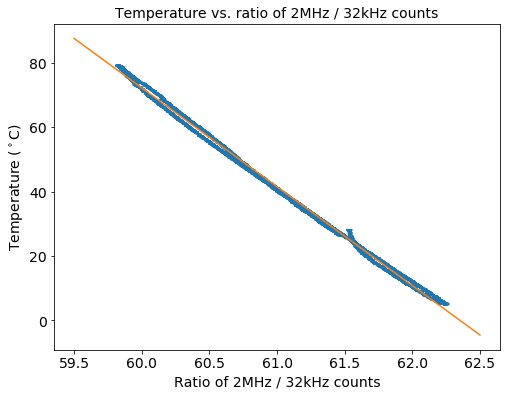

In [5]:
ratios_2M_32k = counts_2M / counts_32k
slope_ratio, intercept_ratio = scipy.stats.linregress(ratios_2M_32k, temperature)[:2]
print('Slope:', slope_ratio, 'Intercept:', intercept_ratio)

x = np.array([59.5, 62.5])
plt.figure(figsize=(8, 6))
plt.plot(ratios_2M_32k, temperature)
plt.plot(x, slope_ratio * x + intercept_ratio)
plt.title('Temperature vs. ratio of 2MHz / 32kHz counts', fontsize=14)
plt.xlabel('Ratio of 2MHz / 32kHz counts', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('ratio_temp.pdf', bbox_inches='tight')
plt.show()

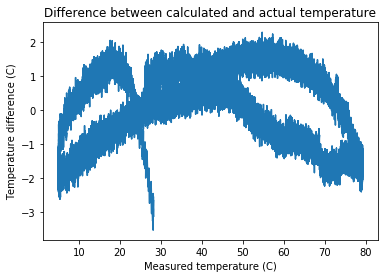

In [6]:
diff = slope_ratio * ratios_2M_32k + intercept_ratio - temperature

plt.plot(temperature, diff)
plt.title('Difference between calculated and actual temperature')
plt.xlabel('Measured temperature (C)')
plt.ylabel('Temperature difference (C)')
plt.show()